In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("data.csv")

In [3]:
# Chuyển y_pred_random_forest và y_pred_logistic thành 0,1
df["y_pred_random_forest"] = df["y_pred_random_forest"].apply(
    lambda x: 1 if x > 0.5 else 0
)
df["y_pred_logistic"] = df["y_pred_logistic"].apply(lambda x: 1 if x > 0.5 else 0)

df["y_act"] = df["y_act"].astype(int)
df["y_pred_random_forest"] = df["y_pred_random_forest"].astype(int)

In [4]:
df.head()

,y_act,y_pred_random_forest,y_pred_logistic
0,1,1,1
1,0,0,0
2,1,1,1
3,1,1,0
4,0,0,0


In [5]:
print(df.dtypes)  # Kiểm tra kiểu dữ liệu của từng cột
print(df["y_act"].unique())  # Kiểm tra giá trị có bất thường không
print(df["y_pred_random_forest"].unique())  # Kiểm tra giá trị có bất thường không

y_act                   int64
y_pred_random_forest    int64
y_pred_logistic         int64
dtype: object
[1 0]
[1 0]


In [6]:
def calculate_tp_tn_fp_fn(df, column_name):
    tp = ((df["y_act"] == 1) & (df[column_name] == 1)).sum()
    tn = ((df["y_act"] == 0) & (df[column_name] == 0)).sum()
    fp = ((df["y_act"] == 0) & (df[column_name] == 1)).sum()
    fn = ((df["y_act"] == 1) & (df[column_name] == 0)).sum()
    return tp, tn, fp, fn

In [7]:
sum(df["y_act"] == df["y_pred_random_forest"])  # Số lượng 1 trong cột y_act

10566

In [8]:
tp_rf, tn_rf, fp_rf, fn_rf = calculate_tp_tn_fp_fn(df, "y_pred_random_forest")
tp_lg, tn_lg, fp_lg, fn_lg = calculate_tp_tn_fp_fn(df, "y_pred_logistic")

In [ ]:
def calculate_accuracy(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn)


def calculate_recall_positive(tp, fn):
    return tp / (tp + fn)


def calculate_recall_negative(tn, fp):
    return tn / (tn + fp)


def calculate_precision_positive(tp, fp):
    return tp / (tp + fp)


def calculate_precision_negative(tn, fn):
    return tn / (tn + fn)


def calculate_f1_score(precision, recall):
    return 2 * precision * recall / (precision + recall)

### Random Forest


In [10]:
accuracy_rf = calculate_accuracy(tp_rf, tn_rf, fp_rf, fn_rf)
recall_positive_rf = calculate_recall_positive(tp_rf, fn_rf)
recall_negative_rf = calculate_recall_negative(tn_rf, fp_rf)
precision_positive_rf = calculate_precision_positive(tp_rf, fp_rf)
precision_negative_rf = calculate_precision_negative(tn_rf, fn_rf)
f1_score_positive_rf = calculate_f1_score(precision_positive_rf, recall_positive_rf)
f1_score_negative_rf = calculate_f1_score(precision_negative_rf, recall_negative_rf)

print("Random Forest")
print("Accuracy:", accuracy_rf)
print("Recall positive:", recall_positive_rf)
print("Recall negative:", recall_negative_rf)
print("Precision positive:", precision_positive_rf)
print("Precision negative:", precision_negative_rf)
print("F1 score positive:", f1_score_positive_rf)
print("F1 score negative:", f1_score_negative_rf)

Random Forest
Accuracy: 0.6705165630156111
Recall positive: 0.6405635232897576
Recall negative: 0.7004696027414646
Precision positive: 0.681382476036182
Precision negative: 0.6608789366542929
F1 score positive: 0.660342797330891
F1 score negative: 0.6800985828712262


### Thử lại với Scikit-learn


In [11]:
print(accuracy_score(df["y_act"], df["y_pred_random_forest"]))
print(accuracy_score(df["y_act"], df["y_pred_logistic"]))

0.6705165630156111
0.6158141896179719


### Logistic Regression


In [12]:
accuracy_lg = calculate_accuracy(tp_lg, tn_lg, fp_lg, fn_lg)
recall_positive_lg = calculate_recall_positive(tp_lg, fn_lg)
recall_negative_lg = calculate_recall_negative(tn_lg, fp_lg)
precision_positive_lg = calculate_precision_positive(tp_lg, fp_lg)
precision_negative_lg = calculate_precision_negative(tn_lg, fn_lg)
f1_score_positive_lg = calculate_f1_score(precision_positive_lg, recall_positive_lg)
f1_score_negative_lg = calculate_f1_score(precision_negative_lg, recall_negative_lg)

print("Logistic Regression")
print("Accuracy:", accuracy_lg)
print("Recall positive:", recall_positive_lg)
print("Recall negative:", recall_negative_lg)
print("Precision positive:", precision_positive_lg)
print("Precision negative:", precision_negative_lg)
print("F1 score positive:", f1_score_positive_lg)
print("F1 score negative:", f1_score_negative_lg)

Logistic Regression
Accuracy: 0.6158141896179719
Recall positive: 0.5430892245208783
Recall negative: 0.6885391547150653
Precision positive: 0.6355265112134264
Precision negative: 0.6011080332409973
F1 score positive: 0.5856830002737475
F1 score negative: 0.6418599148130619


### Thử lại với Scikit-learn cho Logistic Regression


In [14]:
print(accuracy_score(df["y_act"], df["y_pred_logistic"]))

0.6158141896179719


### Confusion Matrix


In [19]:
def calculate_confusion_matrix(tp, tn, fp, fn):
    total = tp + tn + fp + fn

    return pd.DataFrame(
        {
            "Positive": [tp / total, fp / total],
            "Negative": [fn / total, tn / total],
        },
        index=["Positive", "Negative"],
    )

In [20]:
# Vẽ confusion matrix
confusion_matrix_rf = calculate_confusion_matrix(tp_rf, tn_rf, fp_rf, fn_rf)
confusion_matrix_lg = calculate_confusion_matrix(tp_lg, tn_lg, fp_lg, fn_lg)

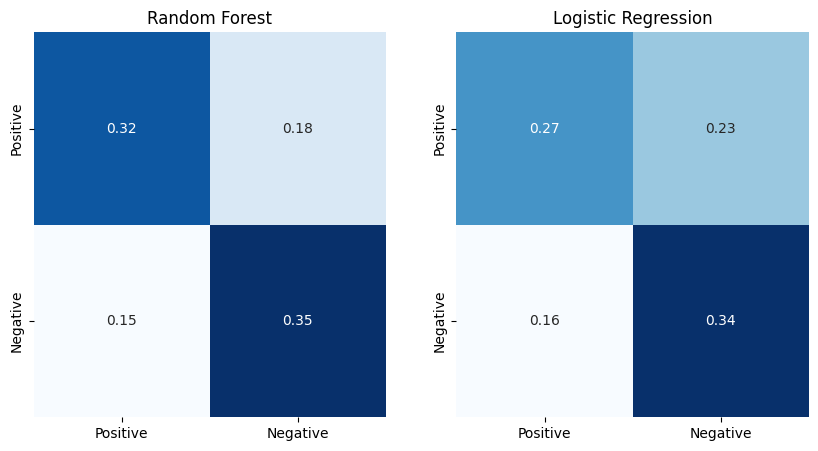

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_rf, annot=True, cmap="Blues", cbar=False)
plt.title("Random Forest")
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix_lg, annot=True, cmap="Blues", cbar=False)
plt.title("Logistic Regression")
plt.show()

### Vẽ đồ thị roc_curve và roc_auc_score

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

In [28]:
fpr_rf, tpr_rf, thresholds  = roc_curve(df["y_act"], df["y_pred_random_forest"])
auc_score_rf = roc_auc_score(df["y_act"], df["y_pred_random_forest"])

In [30]:
fpr_rf, tpr_rf, thresholds

(array([0.       , 0.2995304, 1.       ]),
 array([0.        , 0.64056352, 1.        ]),
 array([inf,  1.,  0.]))